In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time
import SHFunctions as shf
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
np.set_printoptions(linewidth = 200)

In [2]:
A = shf.MakeSingularA(5, 2, delta = .00010)

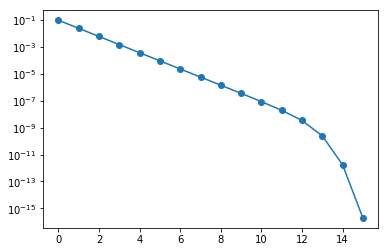

In [3]:
Ss = shf.NewtonPoly(A)
ax = plt.subplot(111)
ax.semilogy(Ss['errs'],'-o')

In [4]:
# X_{i}에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['Xs'])):
    d, ev = nla.eig(Ss['Xs'][i])
    Ds.append(d)
    EVs.append(ev)

for i in range(len(Ds)):
    print(Ds[i])
    print(EVs[i])

[0. 0. 0. 0. 0.]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[ 0.499925   -0.1384481  -0.01286427 -0.10096509 -0.04513462]
[[ 0.4472136   0.53189733  0.31129547  0.15122555  0.31517214]
 [ 0.4472136   0.49777657 -0.91843048 -0.6746908  -0.93025042]
 [ 0.4472136   0.05985234 -0.19120901 -0.03681359  0.08419751]
 [ 0.4472136  -0.04222717  0.02087147 -0.45814781 -0.06004251]
 [ 0.4472136  -0.68113015  0.15028     0.55737645  0.15686414]]
[ 0.74988749 -0.14120586 -0.01286638 -0.10201479 -0.04522675]
[[ 0.4472136   0.53189733 -0.31129547  0.15122555 -0.31517214]
 [ 0.4472136   0.49777657  0.91843048 -0.6746908   0.93025042]
 [ 0.4472136   0.05985234  0.19120901 -0.03681359 -0.08419751]
 [ 0.4472136  -0.04222717 -0.02087147 -0.45814781  0.06004251]
 [ 0.4472136  -0.68113015 -0.15028     0.55737645 -0.15686414]]
[ 0.87486872 -0.14120695 -0.01286638 -0.1020149  -0.04522675]
[[ 0.4472136   0.53189733 -0.31129547  0.15122555 -0.31517214]
 [ 0.447213

In [5]:
for i in range(len(EVs)-1):
    Pre, Nex = EVs[i], EVs[i+1]
    for j in range(Pre.shape[1]):
        if np.sign(np.real(Pre[0,j])) != np.sign(np.real(Nex[0,j])):
            Nex[:,j] = -Nex[:,j]
    print(nla.norm(Pre - Nex, 'fro'))

3.0192947175507037
5.2535538407379956e-15
3.4003783906256627e-15
4.476318050547057e-15
2.9547326559206556e-15
3.7867436065173596e-15
3.0436602105439486e-15
4.849563362995048e-15
4.267330898287705e-15
6.332857465586424e-15
6.6578171741597175e-15
5.617312121254918e-15
6.031951575168916e-15
5.117616543860323e-15
5.752260390042828e-15
2.721072889725067e-15


In [6]:
B = np.zeros(A.shape)
B = B.astype(complex)
for i in range(A.shape[0]):
    B[i,:,:] = np.dot(A[i,:,:], EVs[-1])
B

array([[[ 1.49056291e-01+0.j,  8.54738676e-02+0.j,  4.05677616e-03+0.j,  1.69832128e-02+0.j,  1.48975718e-02+0.j],
        [ 1.49056291e-01+0.j,  7.99907917e-02+0.j, -1.19689082e-02+0.j, -7.57703810e-02+0.j, -4.39711217e-02+0.j],
        [ 1.49056291e-01+0.j,  9.61804197e-03+0.j, -2.49181962e-03+0.j, -4.13430877e-03+0.j,  3.97985186e-03+0.j],
        [ 1.49056291e-01+0.j, -6.78574538e-03+0.j,  2.71995274e-04+0.j, -5.14517670e-02+0.j, -2.83809211e-03+0.j],
        [ 1.49056291e-01+0.j, -1.09455010e-01+0.j,  1.95843616e-03+0.j,  6.25955270e-02+0.j,  7.41466156e-03+0.j]],

       [[-2.98157304e-01+0.j,  6.17371200e-01+0.j,  3.15352245e-01+0.j,  1.68208761e-01+0.j,  3.30069709e-01+0.j],
        [-2.98157304e-01+0.j,  5.77767363e-01+0.j, -9.30399390e-01+0.j, -7.50461179e-01+0.j, -9.74221541e-01+0.j],
        [-2.98157304e-01+0.j,  6.94703806e-02+0.j, -1.93700831e-01+0.j, -4.09479033e-02+0.j,  8.81773597e-02+0.j],
        [-2.98157304e-01+0.j, -4.90129193e-02+0.j,  2.11434688e-02+0.j, -5.095

In [7]:
BSs = shf.NewtonPoly(B)

In [8]:
d, v = nla.eig(BSs['sol'])
BSs['sol'][abs(BSs['sol']) < 1e-15] = 0
d[abs(d) < 1e-15] = 0
v[abs(v) < 1e-15] = 0
print(BSs['sol'])
print(d)
print(v)

[[ 0.99970006+0.j  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.14120695+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j -0.01286638+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j -0.1020149 +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j -0.04522675+0.j]]
[ 0.99970006+0.j -0.14120695+0.j -0.1020149 +0.j -0.04522675+0.j -0.01286638+0.j]
[[ 1.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  1.00000000e+00+0.j -1.54782636e-15-0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -1.08792876e-15+0.j  1.98272724e-15-0.j  5.71424269e-15+0.j  1.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -2.08166817e-15+0.j  1.00000000e+00+0.j  1.28417992e-15+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  3.95490970e-15+0.j -2.50192928e-15-0.j  1.00000000e+00+0.j  1.86261